In [1]:
%load_ext autoreload
%autoreload 2
import poisson_atac as patac
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

Global seed set to 0


In [2]:
import poisson_atac.utils

In [3]:
from poisson_atac.utils import dataset_map_simple as dataset_map

In [4]:
sns.set_style("whitegrid")

fig_path = '/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/Figure1'
table_path = '/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/tables'

# Neurips dataset

In [5]:
adata = patac.data.load_neurips(only_train=False, convert_counts = False)

## Infer isolated label

In [6]:
table = (pd.crosstab(adata.obs.cell_type, adata.obs.batch) > 0).sum(axis=1).to_frame()
table.columns = ['Number of batches'] # ID2-hi myeloid prog is the isolated label

In [8]:
table.to_csv(os.path.join(table_path, 'neurips_isolated_label.csv'), sep='\t')

## Plot count distribution

In [10]:
adata

AnnData object with n_obs × n_vars = 62501 × 116490
    obs: 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'cell_type', 'pseudotime_order_ATAC', 'batch', 'pseudotime_order_GEX', 'is_train', 'size_factor'
    var: 'feature_types'
    uns: 'dataset_id', 'gene_activity_var_names', 'organism', 'sample_pm_varnames'
    obsm: 'gene_activity', 'lsi_full', 'lsi_red', 'umap'
    layers: 'counts'

### Stats on the counts

In [12]:
all_counts = patac.pl._distributionplot.counts_per_bin(adata.layers['counts'].data, adata, limit=None)

In [13]:
all_counts['uneven'] = all_counts['bin'].astype(int) % 2

In [14]:
even_odd = all_counts.loc[all_counts.bin != 0].groupby('uneven').sum()

In [15]:
even_odd.loc[0, 'count'] / even_odd.loc[1, 'count']

4.869727301256265

In [23]:
total_non_zero=all_counts.loc[all_counts.bin != 0, 'count'].sum()

In [20]:
all_counts.loc[all_counts.bin == 2, 'count'].sum()

165650479

In [24]:
all_counts.loc[all_counts.bin == 2, 'count'].sum()/total_non_zero

0.7391363875104222

In [27]:
all_counts.loc[all_counts.bin > 2, 'count'].sum()

26885446

In [26]:
all_counts.loc[all_counts.bin > 2, 'count'].sum()/total_non_zero

0.11996350118037709

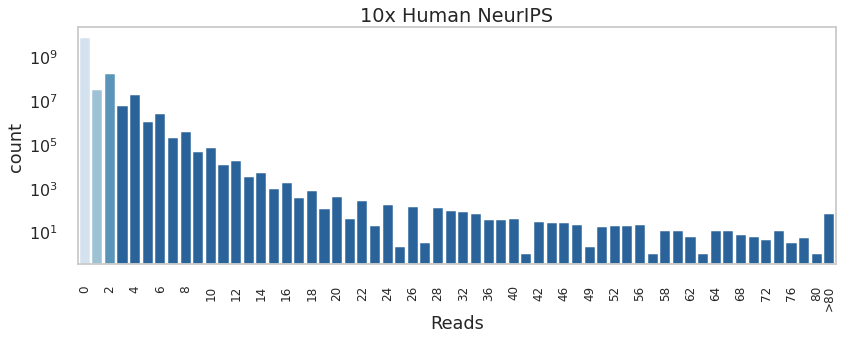

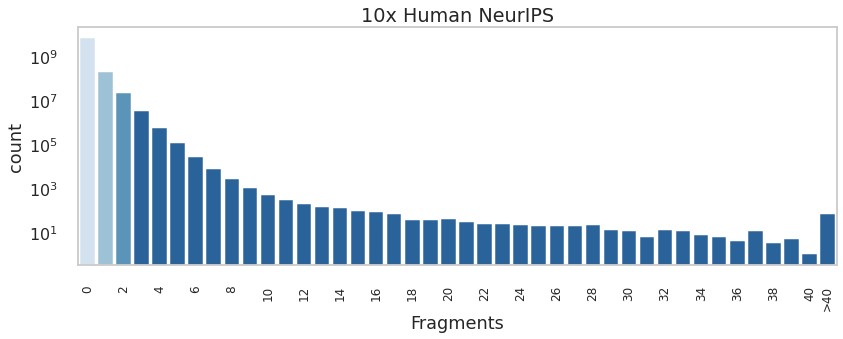

In [21]:
patac.pl.count_distribution(adata, layer="counts", figsize=(12, 5), limit=80, save_path=fig_path, save_prefix="neurips", title=dataset_map['neurips'])

## Plot proportions

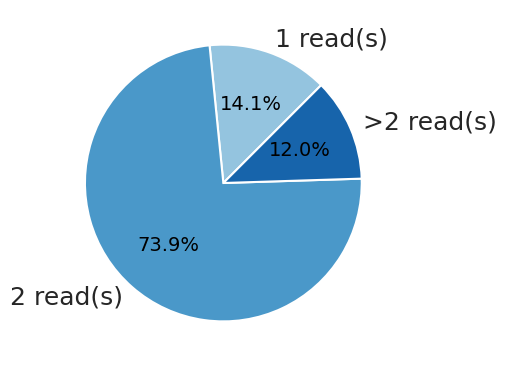

In [11]:
patac.pl.proportions(adata, lower_limit=1, upper_limit=2, layer="counts", save_path=fig_path, save_prefix="neurips", figsize=(6,4))

## Plot mean-variance relationship

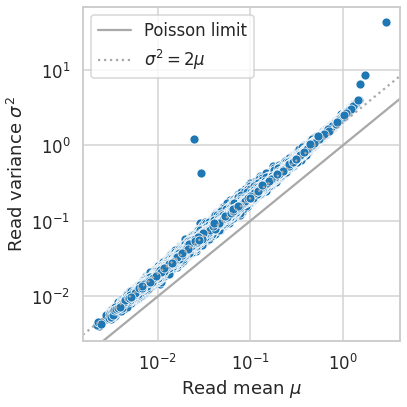

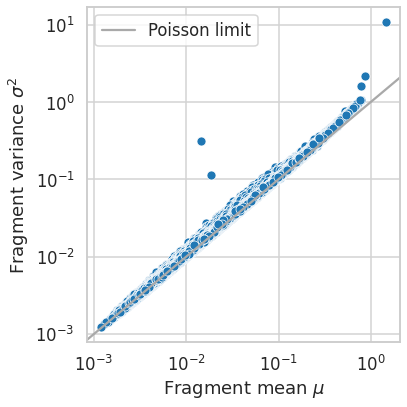

In [9]:
patac.pl.mean_variance(adata, layer="counts", figsize=(6,6), save_path=fig_path, save_prefix="neurips")

# Hematopoeisis dataset (Satpathy et al.)

In [22]:
adata = patac.data.load_hematopoiesis(convert_counts = False)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [23]:
adata

AnnData object with n_obs × n_vars = 63882 × 134104
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Internal_Name', 'Group_Barcode', 'cell_type'
    var: 'Feature', 'n_cells'
    obsm: 'X_umap'
    layers: 'counts'

## Infer isolated label

In [25]:
table = (pd.crosstab(adata.obs.cell_type, adata.obs.Group) > 0).sum(axis=1).to_frame()
table.columns = ['Number of batches']# Pre-B is isolated label

In [26]:
table.to_csv(os.path.join(table_path, 'satpathy_isolated_label.csv'), sep='\t')

## Plot count distribution

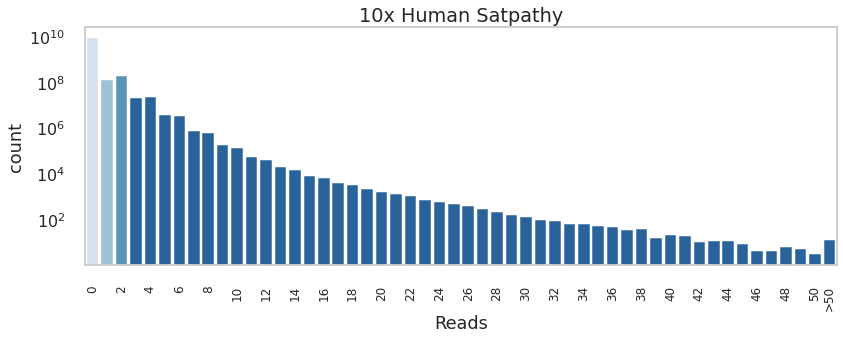

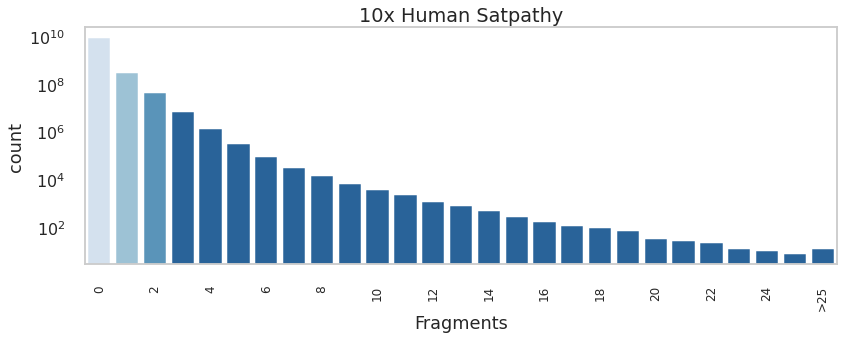

In [24]:
patac.pl.count_distribution(adata, layer="counts", figsize = (12, 5), limit = 50, save_path=fig_path, save_prefix="hematopoiesis", title=dataset_map['satpathy'])

## Plot proportions

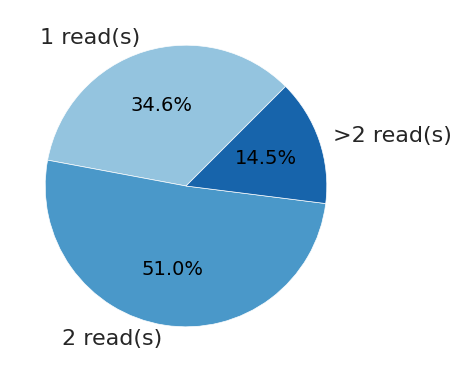

In [11]:
patac.pl.proportions(adata, lower_limit=1, upper_limit=2, layer="counts", save_path=fig_path, save_prefix="hematopoiesis", figsize=(6,4))

## Plot mean-variance relationship

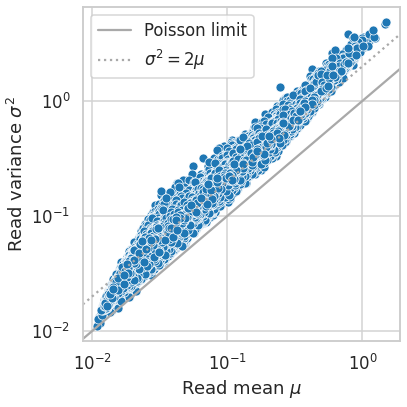

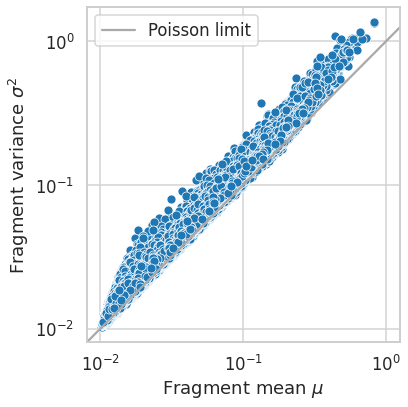

In [12]:
patac.pl.mean_variance(adata, layer="counts", figsize=(6,6), save_path=fig_path, save_prefix="hematopoiesis")

## Plot size factor

In [25]:
adata.obs['size_factor'] = adata.layers['counts'].sum(axis=1).A.squeeze()

In [26]:
order = adata.obs.groupby('cell_type').median().sort_values('size_factor').index

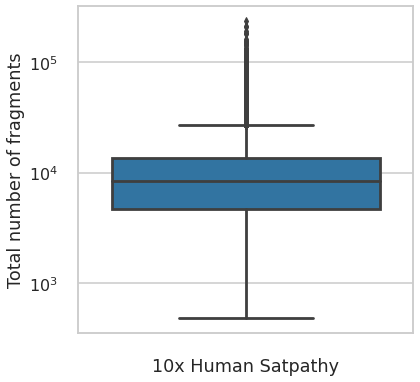

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(data=adata.obs, y='size_factor', ax=ax)
#plt.ylabel('Cell type')
ax.set_ylabel('Total number of fragments')
ax.set_xlabel(dataset_map['satpathy'])
ax.set(yscale='log')
plt.savefig(os.path.join(fig_path, 'total_frag_counts_satpathy.pdf'))
plt.savefig(os.path.join(fig_path, 'total_frag_counts_satpathy.png'))

In [23]:
adata.obs.size_factor.mean()/adata.obs.size_factor.std()

1.1934321

# Fly dataset 

In [5]:
adata = patac.data.load_aerts(convert_counts = False)

In [6]:
adata

AnnData object with n_obs × n_vars = 117613 × 77858
    obs: 'sample_barcode', 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'total', 'duplicate', 'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'passed_filters', 'cell_id', 'is__cell_barcode', 'TSS_fragments', 'DNase_sensitive_region_fragments', 'enhancer_region_fragments', 'promoter_region_fragments', 'on_target_fragments', 'blacklist_region_fragments', 'peak_region_fragments', 'peak_region_cutsites', 'runName', 'stage', 'tissuePart', 'dgrpLine', 'doublet', 'CellType_lvl0', 'CellType_lvl1', 'CellType_lvl2'
    var: 'n_cells'
    layers: 'counts'

## Infer isolated label

In [38]:
table =(pd.crosstab(adata.obs.CellType_lvl1, adata.obs.runName) > 0).sum(axis=1).to_frame()
table.columns = ['Number of batches']# Pre-B is isolated label

In [39]:
table.to_csv(os.path.join(table_path, 'aerts_isolated_label.csv'), sep='\t')

## Plot count distribution

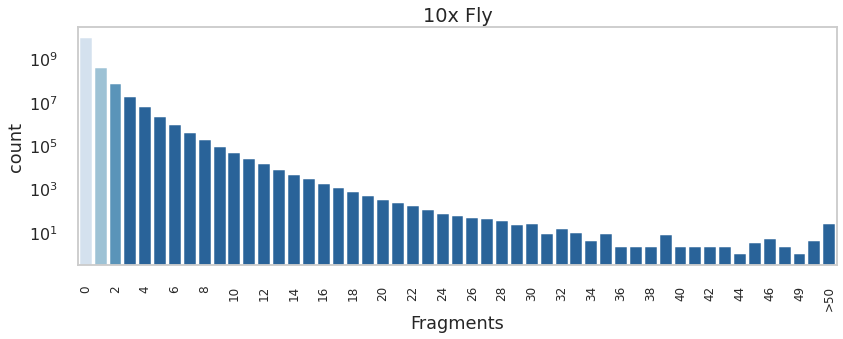

In [7]:
patac.pl.count_distribution(adata, layer="counts", figsize = (12, 5), limit = 50, save_path=fig_path, save_prefix="aerts", label='Fragments', title=dataset_map['aerts'])

## Plot proportions

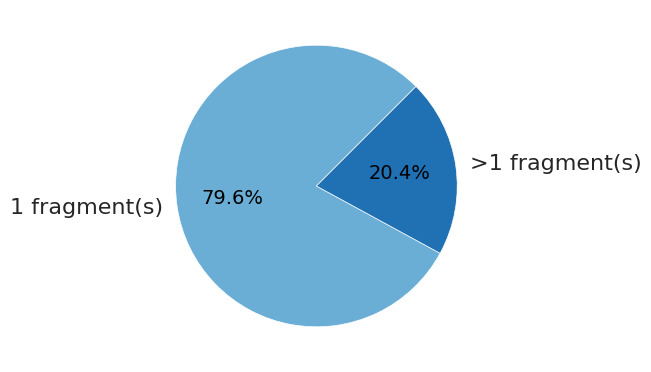

In [15]:
patac.pl.proportions(adata, lower_limit=1, upper_limit=1, layer="counts", save_path=fig_path, save_prefix="aerts", label='fragment(s)', figsize=(7, 4))

## Plot mean-variance relationship

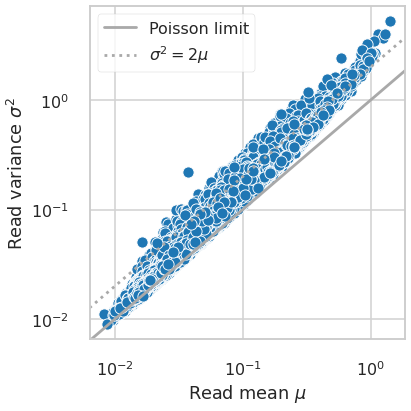

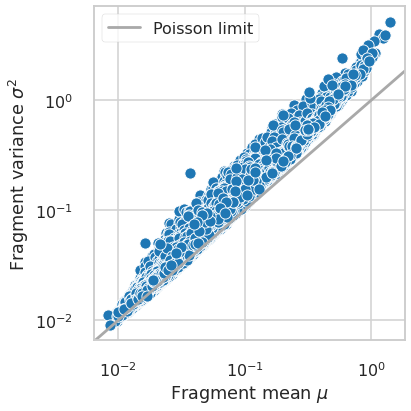

In [12]:
patac.pl.mean_variance(adata[adata.obs.sample(frac=0.1).index], layer="counts", figsize=(6,6), save_path=fig_path, save_prefix="aerts")

In [46]:
adata.obs['size_factor'] = adata.layers['counts'].sum(axis=1).A.squeeze()

In [48]:
#order = adata.obs.groupby('cell_type').median().sort_values('size_factor').index

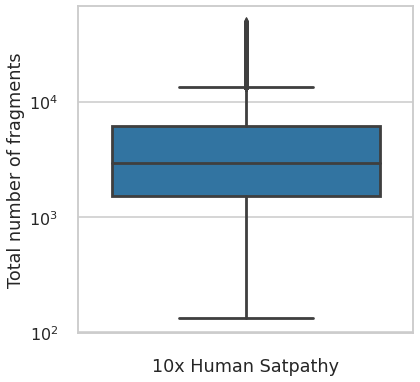

In [49]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.boxplot(data=adata.obs, y='size_factor', ax=ax)
#plt.ylabel('Cell type')
ax.set_ylabel('Total number of fragments')
ax.set_xlabel(dataset_map['satpathy'])
ax.set(yscale='log')
plt.savefig(os.path.join(fig_path, 'total_frag_counts_aerts.pdf'))
plt.savefig(os.path.join(fig_path, 'total_frag_counts_aerts.png'))

# sci-ATAC-seq3 dataset 

In [5]:
import scanpy as sc

In [6]:
adata = sc.read('/lustre/groups/ml01/workspace/laura.martens/data/trapnell_sciATAC_fetal_tissue/all_tissues_filtered.h5ad', backed='r')

In [7]:
peaks = adata.var_names

In [8]:
adata = sc.read('/lustre/groups/ml01/workspace/laura.martens/data/trapnell_sciATAC_fetal_tissue/all_tissues.h5ad', backed='r')

In [9]:
adata

AnnData object with n_obs × n_vars = 720613 × 1050819 backed at '/lustre/groups/ml01/workspace/laura.martens/data/trapnell_sciATAC_fetal_tissue/all_tissues.h5ad'
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell', 'sample_name', 'donor_id', 'day_of_pregnancy', 'sex', 'tissue', 'batch', 'total', 'total_deduplicated', 'total_deduplicated_peaks', 'total_deduplicated_tss', 'frip', 'frit', 'x_chrom_window_counts', 'y_chrom_window_counts', 'autosome_window_counts', 'blacklist_fraction', 'RNA_snn_res.0.3', 'seurat_clusters', 'nCount_peaks', 'nFeature_peaks', 'tissue_umap_1', 'tissue_umap_2', 'cell_type'
    obsm: 'RNA', 'pca.l2.harmony', 'umap'

In [10]:
adata = adata[adata.obs.sample(frac=0.1).index, adata.var_names.isin(peaks)]

In [11]:
adata = adata.to_memory()

## Infer isolated label

In [17]:
table =(pd.crosstab(adata.obs.cell_type, adata.obs.sample_name) > 0).sum(axis=1).to_frame()
table.columns = ['Number of batches']# Pre-B is isolated label

In [23]:
table.to_csv(os.path.join(table_path, 'trapnell_isolated_label.csv'), sep='\t')

## Plot count distribution

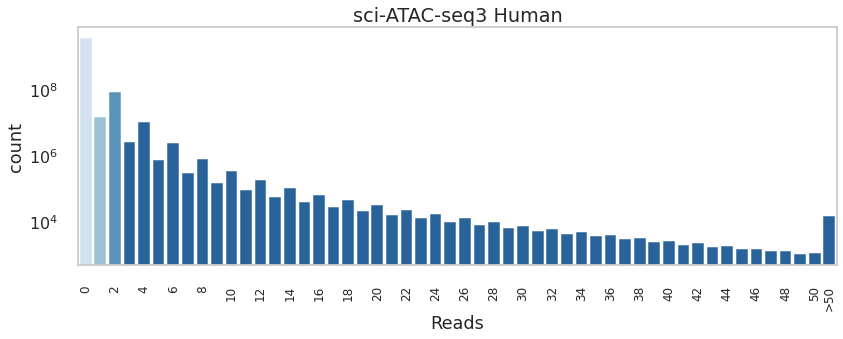

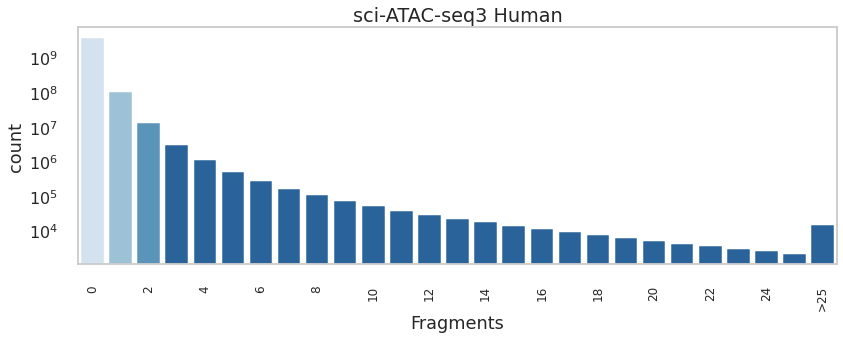

In [12]:
patac.pl.count_distribution(adata, layer=None, figsize = (12, 5), limit = 50, save_path=fig_path, save_prefix="trapnell", label=None, title=dataset_map['trapnell_old'])

## Plot proportions

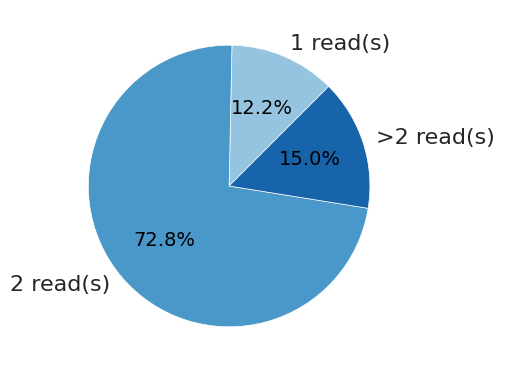

In [30]:
patac.pl.proportions(adata, lower_limit=1, upper_limit=2, layer=None, save_path=fig_path, save_prefix="trapnell", figsize=(6, 4))

## Plot mean-variance relationship

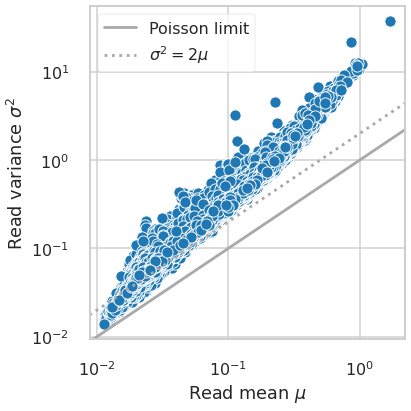

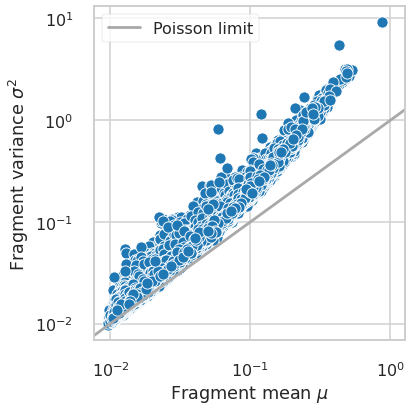

In [31]:
patac.pl.mean_variance(adata, layer=None, figsize=(6,6), save_path=fig_path, save_prefix="trapnell")